In [1]:
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [5]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=20,
                          batch_size=200,
                          verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 0.4444 - accuracy: 0.8809 - val_loss: 0.2190 - val_accuracy: 0.9373
Epoch 2/20
 - 1s - loss: 0.1922 - accuracy: 0.9447 - val_loss: 0.1570 - val_accuracy: 0.9555
Epoch 3/20
 - 1s - loss: 0.1371 - accuracy: 0.9600 - val_loss: 0.1276 - val_accuracy: 0.9627
Epoch 4/20
 - 1s - loss: 0.1060 - accuracy: 0.9696 - val_loss: 0.1094 - val_accuracy: 0.9672
Epoch 5/20
 - 1s - loss: 0.0839 - accuracy: 0.9763 - val_loss: 0.1028 - val_accuracy: 0.9696
Epoch 6/20
 - 1s - loss: 0.0692 - accuracy: 0.9807 - val_loss: 0.0915 - val_accuracy: 0.9736
Epoch 7/20
 - 1s - loss: 0.0568 - accuracy: 0.9845 - val_loss: 0.0931 - val_accuracy: 0.9721
Epoch 8/20
 - 1s - loss: 0.0479 - accuracy: 0.9868 - val_loss: 0.0856 - val_accuracy: 0.9750
Epoch 9/20
 - 1s - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 10/20
 - 1s - loss: 0.0329 - accuracy: 0.9917 - val_loss: 0.0788 - val_accuracy: 0.9766
Epoch 11/20
 - 1s 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

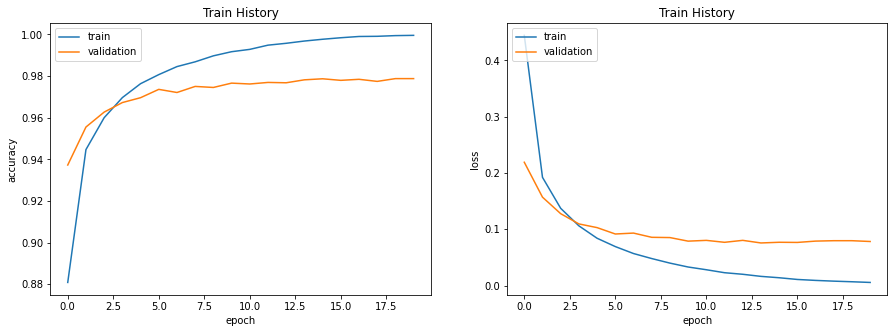

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121); show_train_history(train_history, 'accuracy', 'val_accuracy')
plt.subplot(122); show_train_history(train_history, 'loss', 'val_loss')
plt.show()

In [14]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print('lose = ', scores[0])
print('accuracy = ', scores[1])

10000/10000 [==============================] - 0s 14us/step
lose =  0.07000721053881861
accuracy =  0.9815000295639038


In [15]:
prediction = model.predict_classes(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
import pandas as pd
pd.crosstab(y_test_label, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,0,0,0,4,1,2,1
1,0,1127,4,0,0,0,2,0,2,0
2,3,1,1016,1,1,0,2,4,3,1
3,1,0,1,992,0,6,0,3,3,4
4,2,0,1,1,953,0,4,2,2,17
5,2,0,0,7,1,871,5,1,3,2
6,5,2,2,1,1,3,943,1,0,0
7,0,4,8,4,0,0,0,1006,1,5
8,7,0,4,9,3,2,4,5,937,3
